In [1]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [2]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('/home/pawan/KeyBert/Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion'],
 [''],
 [''],
 ['promotion'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion'],
 [''],
 [''],
 ['promotion'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [6]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [7]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [8]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [9]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [11]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [12]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [13]:
data["clean_text"][11]

'Waren oder sind Sie seit der letzten Befragung im in irgendeiner Form erwerbstätig . Bitte geben Sie mit Hilfe der Zeilennummern an bei welcher Stelle es sich um Ihre aktuelle Stelle handelt . Handelt es sich bei Ihrer letzten beruflichen Station um dieselbe Stelle die Sie zum Zeitpunkt der letzten Befragung im ausgeübt haben . Handelte es sich bei Ihrer letzten Stelle um eine Tätigkeit in der Wissenschaft . Welcher der folgenden Personalkategorien konnten Sie sich zuordnen . Waren Sie zuletzt im öffentlichen Dienst bzw . einem dem öffentlichen Dienst tariflich angeglichenen Arbeitsverhältnis beschäftigt . Wie viele Mitarbeiter innen waren bei Ihrem Arbeitgeber beschäftigt . Welchem Wirtschaftsbereich gehörte der Betrieb bzw . die Einrichtung in dem der Sie arbeiteten schwerpunktmäßig an . Haben Sie zuletzt in einer Position gearbeitet in der ... Haben Sie zuletzt in einer Position gearbeitet in der ... Wie viel Euro pro Jahr erhielten Sie darüber hinaus jährlich in Form von Zulagen .

In [14]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=True))

In [15]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [16]:
data["Clean_Text_Sentences"] = new_clean_text

In [17]:
data["Clean_Text_Sentences"][10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten . Ich habe . Ich habe das Niveau . Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr . Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr . Ich habe noch kein Prüfungsergebnis erhalten .',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten . Ich habe die Gesamtnote . Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr . Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr . Ich habe noch kein Prüfungsergebnis erhalten .',
 'Was machen Sie zurzeit genau . Ich studiere in einem Studiengang an einer Hochschule oder Universität . Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang . DSH TestDaF . Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg . Ich warte auf meine

In [18]:
Preprocesed_text = []
for i in range(len(data["Clean_Text_Sentences"])):
    Preprocesed_text.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        Preprocesed_text[i].append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["Clean_Text_Sentences"][i][j])) 

In [19]:
Preprocesed_text[10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten. Ich habe. Ich habe das Niveau. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten. Ich habe die Gesamtnote. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Was machen Sie zurzeit genau. Ich studiere in einem Studiengang an einer Hochschule oder Universität. Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang. DSH TestDaF. Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg. Ich warte auf meinen Prüfungstermin

In [20]:
cleaned_text = []
for i in range(len(Preprocesed_text)):
    cleaned_text.append([])
    for j in range(len(Preprocesed_text[i])):
        for line in Preprocesed_text[i][j].split('\n'):
            # Replace multiple dots with space
            line = re.sub('\. \.+', '.', line) 
            # Remove single dots
            cleaned_text[i].append(re.sub('\.', '.', line))

In [21]:
cleaned_text[1]

['Wie ist dieser studienvorbereitende Kurs verlaufen. Dieser Kurs ist noch nicht beendet und ich besuche Ihn zurzeit weiterhin. Dieser Kurs ist beendet und ich habe an einer Sprachprüfung für den Hochschulzugang. DSH oder TestDAF oder einer Feststellungsprüfung eines Studienkollegs teilgenommen. Dieser Kurs ist beendet aber ich habe noch nicht an der Sprachprüfung für den Hochschulzugang oder der Feststellungsprüfung teilgenommen. Ich habe diesen Kurs vorzeitig abgebrochen.',
 'Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten. Ich habe. Ich habe das Niveau. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten. Ich habe die Gesamtnote. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ic

In [22]:
#using spacy model for POS tagging
nlp = spacy.load('de_core_news_lg')
Extracted_Pos_tags=[]  # can change it to Extracted_Noun
for i in range(len(cleaned_text)):
    Extracted_Pos_tags.append([])
    for j in range(len(cleaned_text[i])):
        Extracted_Pos_tags[i].append([])
        doc = nlp(cleaned_text[i][j])
        for t in doc:
            tag=t.pos_
            if t.text not in Extracted_Pos_tags[i][j]:
                Extracted_Pos_tags[i][j].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [23]:
Extracted_Pos_tags[0]

[[('Die', 'DET'),
  ('Hochschule', 'NOUN'),
  ('an', 'ADP'),
  ('der', 'DET'),
  ('Sie', 'PRON'),
  ('im', 'ADP'),
  ('Dezember', 'NOUN'),
  ('zur', 'ADP'),
  ('Promotion', 'NOUN'),
  ('registriert', 'VERB'),
  ('waren', 'AUX'),
  ('hat', 'AUX'),
  ('ebenfalls', 'ADV'),
  ('Interesse', 'NOUN'),
  ('daran', 'ADV'),
  ('mehr', 'ADV'),
  ('über', 'ADP'),
  ('die', 'DET'),
  ('Promotionsbedingungen', 'NOUN'),
  ('ihrer', 'DET'),
  ('Promovierenden', 'NOUN'),
  ('zu', 'PART'),
  ('erfahren', 'VERB'),
  ('.', 'PUNCT')],
 [('Anfang', 'NOUN'),
  ('Dezember', 'NOUN'),
  ('waren', 'AUX'),
  ('Sie', 'PRON'),
  ('an', 'ADP'),
  ('Ihrer', 'DET'),
  ('Hochschule', 'NOUN'),
  ('offiziell', 'ADV'),
  ('als', 'ADP'),
  ('Doktorand', 'NOUN'),
  ('in', 'ADP'),
  ('registriert', 'VERB'),
  ('.', 'PUNCT')],
 [('Handelt', 'VERB'),
  ('es', 'PRON'),
  ('sich', 'PRON'),
  ('um', 'ADP'),
  ('eine', 'DET'),
  ('offiziell', 'ADV'),
  ('der', 'DET'),
  ('Hochschule', 'NOUN'),
  ('gemeldete', 'ADJ'),
  ('Unterbrec

In [24]:
# lemmatizer = GermaLemma()
# lemmatized_words = []
# nlp = spacy.load('de_core_news_lg')

# for i in range(len(Extracted_Pos_tags)):
#     lemmatized_words.append([])
#     for j in range(len(Extracted_Pos_tags[i])):
#         lemmatized_words[i].append([])
#         lemma_spacy = nlp(cleaned_text[i][j])
#         for l in range(len(lemma_spacy)):
#             token = lemma_spacy[l]
#             if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
#                 lemmatized_words[i][j].append(token.lemma_)
#             else:
#                 lemmatized_words[i][j].append(lemmatizer.find_lemma(Extracted_Pos_tags[i][j][l][0], Extracted_Pos_tags[i][j][l][1]))

In [25]:
# lemma_sentences = []
# for i in range(len(lemmatized_words)):
#     lemma_sentences.append([])
#     for j in range(len(lemmatized_words[i])):
#         lemma_sentences[i].append(' '.join(lemmatized_words[i][j]))

In [26]:
# data["Lemma_Text_Sentences"] = lemma_sentences

In [27]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(cleaned_text)):
    for j in range(len(cleaned_text[i])):
        tokens = nltk.word_tokenize(cleaned_text[i][j]) #without nltk.word_tokenize, it gives character level DF
        for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
 

In [28]:
DF

{'Die': {0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 16},
 'Hochschule': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18},
 'an': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'der': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Sie': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'im': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Dezember': {0, 6},
 'zur': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Promotion': {0, 2, 4, 5, 7, 8, 11, 13, 15},
 'registriert': {0},
 'waren': {0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18},
 'hat': {0, 2, 3, 4, 7, 8, 11, 13, 14, 15, 16},
 'ebenfalls': {0},
 'Interesse': {0, 1, 2, 3, 5, 6, 12, 14, 16, 17},
 'daran': {0, 3, 9, 12, 16},
 'mehr': {0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 14, 15, 16, 17, 18},
 'über': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17},
 'die': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16

In [29]:
for word,freq in DF.items():
    print(word,len(freq))

Die 13
Hochschule 18
an 19
der 19
Sie 19
im 19
Dezember 2
zur 18
Promotion 9
registriert 1
waren 15
hat 11
ebenfalls 1
Interesse 10
daran 5
mehr 15
über 16
die 19
Promotionsbedingungen 1
ihrer 6
Promovierenden 2
zu 19
erfahren 5
. 19
Anfang 2
Ihrer 19
offiziell 3
als 19
Doktorand 1
in 19
Handelt 6
es 18
sich 19
um 17
eine 19
gemeldete 1
Unterbrechung 2
Können 3
noch 16
erinnern 1
welchem 17
Quartal 1
mit 19
den 19
Arbeiten 8
begonnen 14
haben 19
zugelassen 1
wurden 15
Ist 14
Ihre 19
darüber 10
informiert 3
dass 17
abgebrochen 7
Ihrem 17
Promotionsverfahren 1
Ausland 12
beteiligt 3
dabei 7
einen 18
gemeinsamen 6
Abschluss 16
Hochschulen 9
aus 19
dem 19
In 19
und 19
cotutelle 1
de 2
thèse 1
ihrem 4
Fachhochschule 6
bzw 16
Waren 15
letzten 17
Jahren 4
Universität 9
des 18
Saarlandes 1
UdS 1
wissenschaftliche 13
Beschäftigte 1
tätig 12
Wie 19
attraktiv 1
bewerten 5
Arbeitgeberin 1
Wurden 4
Sicht 5
Einsparungen 1
vorgenommen 1
Veränderungen 4
führten 1
diese 15
Strukturentscheidungen 1
getr

Ausübung 2
alltäglicher 2
Aktivitäten 9
Versorgung 2
Erholung 2
Pflege 5
sozialer 2
beeinträchtigt 5
welche 13
handelt 8
anerkannt 3
Welcher 13
Grad 3
heute 3
leben 6
Abschlussnote 3
bitten 10
Angaben 8
Studienabschluss 9
berechtigte 2
Wünsche 2
Blick 5
Fortgang 1
bestrebt 1
unsere 1
Befragungen 1
stets 1
weiter 7
Qualifikationen 2
Studium 18
Christian 1
Albrechts 1
geholfen 1
Struktur 6
Angebote 7
zusätzlich 3
studienvorbereitende 2
verlaufen 1
Dieser 1
beendet 7
besuche 2
Ihn 1
zurzeit 12
weiterhin 2
Sprachprüfung 2
Hochschulzugang 2
DSH 2
TestDAF 1
Feststellungsprüfung 2
Studienkollegs 1
diesen 8
vorzeitig 1
TestDaF 2
Prüfung 3
Niveau 5
bestanden 2
weiß 7
kein 10
Prüfungsergebnis 2
Gesamtnote 4
Vorbereitungskurs 1
besuchen 4
Einen 6
Sprachkurs 4
Vorbereitung 6
Telc 1
Schwerpunktkurs 2
Studienkolleg 2
keinen 11
Studienvorbereitung 2
technisches 1
naturwissenschaftliches 1
medizinisches 1
wirtschafts 1
sozialwissenschaftliches 1
geistes 1
kulturwissenschaftliches 1
machen 14
genau 8
s

Ehe 2
Studienkredit 5
Bildungskredit 3
Begabtenförderung 1
Stiftungen 2
Firmen 2
Semesterferien 2
Inland 1
absolviert 4
Forschungsprojekten 1
Planen 1
absolvieren 1
Sprachaufenthalt 1
einige 5
gegebenenfalls 2
Denken 5
aufzugeben 1
Bekannte 2
Geschwister 5
Lehrbeauftragte 2
Professoren 1
Professorinnen 1
ausländische 3
Kontakten 2
Lehrbeauftragten 1
Studiensituation 2
unterschiedlich 2
erlebt 1
genug 2
Ansprechpartner 1
wenden 2
Einzige 1
gefragt 1
niemandem 1
auffallen 1
Beratung 5
Schwerpunkte 1
Prüfungsvorbereitungen 1
Prüfungsarbeiten 1
fachwissenschaftliche 1
Abfassen 1
Texten 1
Referaten 1
Lern 3
Arbeitsschwierigkeiten 1
Betreuungs 2
Beratungsmöglichkeiten 1
Lehrende 2
Sprechstunden 1
festen 7
informelle 1
Studieneinführung 1
Orientierungsveranstaltungen 1
Prüfungsvorbereitung 2
per 3
Mail 3
genommen 2
Zentrale 1
Fachschaft 1
Akademisches 1
Auslandsamt 1
International 1
Office 1
Studienganges 1
Lehrangebotes 1
Weise 3
räumliche 7
sächliche 1
Ausstattung 9
erreichte 1
Studienertra

nötigen 1
genügend 1
vorbei 1
Diskussion 1
falsche 1
gewählt 2
unbefriedigende 2
erforderliche 1
Masterstudienplatz 1
Motive 2
Neigungen 3
nachkommen 2
weiterbilden 2
ausgleichen 2
Spezialgebiet 1
qualifizieren 2
setzt 1
voraus 1
nachstehenden 1
Lebensziele 2
langgehegten 1
fundiertem 1
ausbaufähige 1
entfalten 2
Aufstieg 1
Prestige 2
umfassende 1
selbtsverantwortliche 1
Hinsicht 2
Überdurchschnittliches 2
Funktion 3
einzunehmen 1
auszuschöpfen 1
Fälle 1
optimistisch 1
gesellschaftlichen 2
Auslbildungsberuf 1
erstmals 3
durchschnittliches 1
Monatseinkommen 1
Besonderheiten 1
individuellen 1
Berufswegs 1
exakt 1
erfasst 1
Studiensemestern 1
Verwandte 4
Kredit 5
angesparte 1
durchführen 1
Please 1
select 1
your 1
preferred 1
language 1
for 1
the 1
survey 1
Beschäftigungsposition 1
Besoldungsstufe 1
zugeordnet 1
promoviert 1
Hatten 5
Amt 1
Dekans 1
Dekanin 1
habilitiert 1
primär 1
Gab 1
Arbeitsverträgen 1
ungewollt 1
strukturierte 1
Mindestvertragslaufzeit 1
Doktorandinnen 1
Doktoranden 1

typischerweise 1
erleben 1
gegenseitig 1
Freude 1
Fächer 1
Geschwistern 1
vorangegangenen 2
Abmeldung 1
Ergebniseinsicht 1
Bereitstellung 1
Lehrmaterialien 1
Erbringung 1
Leistungsnachweisen 1
elektronische 1
Laptop 1
Beamer 1
Tablet 1
Smartphone 1
Präsentationssoftware 1
PowerPoint 1
Prezi 1
fachspezifische 1
Software 1
digitalen 1
Anbetracht 1
Schließung 1
Kitas 1
Kindergärten 1
Schulen 1
Elternteil 1
falls 2
Großeltern 1
formale 1
Sitter 1
gefühlt 1
glücklich 1
schwermütig 1
gedrückter 1
phantasievoll 1
greifen 1
Engpässe 1
auszugleichen 1
privater 1
pandemiebedingten 1
Notlagen 1
Nothilfefond 1
Studierendenwerks 1
Darlehenskasse 1
Großen 1
Ganzen 1
gelingt 1
auszukommen 1
fortführen 1
eingeschränkt 2
digitaler 1
Internetverbindung 1
Rechner 1
Viele 1
nutzbar 1
zugänglich 1
Lehrformate 1
flexibler 1
Digitale 1
effizienteren 1
Tools 1
funktionieren 1
zuverlässig 1
Freizeitaktivitäten 1
künstlerisch 2
kulturell 1
sportlich 1
Ausgehend 1
empfehlen 1
Hintergrund 1
Coronavirus 1
infizier

In [30]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [31]:
df_list.sort(key=lambda x:x[1])

In [32]:
df_list

[('registriert', 0.05263157894736842),
 ('ebenfalls', 0.05263157894736842),
 ('Promotionsbedingungen', 0.05263157894736842),
 ('Doktorand', 0.05263157894736842),
 ('gemeldete', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('zugelassen', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('Saarlandes', 0.05263157894736842),
 ('UdS', 0.05263157894736842),
 ('Beschäftigte', 0.05263157894736842),
 ('attraktiv', 0.05263157894736842),
 ('Arbeitgeberin', 0.05263157894736842),
 ('Einsparungen', 0.05263157894736842),
 ('vorgenommen', 0.05263157894736842),
 ('führten', 0.05263157894736842),
 ('Strukturentscheidungen', 0.05263157894736842),
 ('Führten', 0.05263157894736842),
 ('Forschungsprojekts', 0.05263157894736842),
 ('Forschungsprojekt', 0.05263157894736842),
 ('konkretes', 0.05263157894736842),
 ('Graduiertenakademie', 0.05263157894736842),
 ('HHU', 0.052

In [33]:
word_counts = [x[1] for x in df_list]

In [34]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [35]:
df_analysis

,index,0
0,0.052632,2889
1,0.105263,832
2,0.157895,381
3,0.210526,268
4,0.263158,178
5,0.315789,134
6,0.368421,83
7,0.421053,63
8,0.473684,41
9,0.526316,43


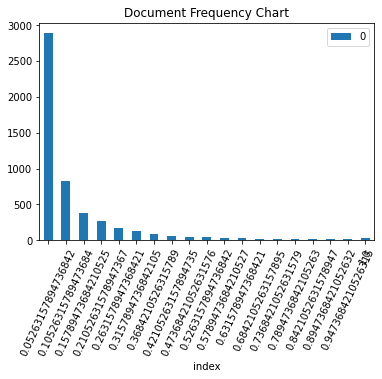

In [36]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [37]:
gt_keywords = []
for i in range(len(ground_truth)):
    gt_keywords.append([])
    for j in range(len(ground_truth[i])):
        if len(ground_truth[i][j].split(" ")) == 1:
            gt_keywords[i].append(ground_truth[i][j])

NameError: name 'ground_truth' is not defined

In [ ]:
len(gt_keywords[12])

In [ ]:
gt_keyphrases = []
for i in range(len(ground_truth)):
    gt_keyphrases.append([])
    for j in range(len(ground_truth[i])):
        if len(ground_truth[i][j].split(" ")) != 1:
            gt_keyphrases[i].append(ground_truth[i][j])

In [ ]:
gt_keyphrases

In [ ]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [ ]:
Pos_tags=[]
for i in range(len(gt_keywords)):
    Pos_tags.append([])
    for j in range(len(gt_keywords[i])):
        sw = nlp(gt_keywords[i][j])
        for t in sw:
            tag=t.pos
            if t.text not in Pos_tags:
                Pos_tags[i].append((t.text, t.pos_))

In [ ]:
Pos_tags[18]

In [ ]:
data['Ground_Truth']

In [ ]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [ ]:
Extracted_Pos_tags=[]
for i in range(len(data['Ground_Truth'])):
    Extracted_Pos_tags.append([])
    sw = nlp(data['Ground_Truth'][i])
    for t in sw:
        tag=t.pos
        if t.text not in Extracted_Pos_tags:
            Extracted_Pos_tags[i].append((t.text,t.pos_))

In [ ]:
Extracted_Pos_tags[0]

In [ ]:
Extracted_Pos_tags=[]
for i in range(len(gt_keyphrases)):
    Extracted_Pos_tags.append([])
    for j in range(len(gt_keyphrases[i])):
        sw = nlp(gt_keyphrases[i][j])
        for t in sw:
            tag=t.pos
            if t.text not in Extracted_Pos_tags:
                Extracted_Pos_tags[i].append((t.text,t.pos_))

In [ ]:
Extracted_Pos_tags
# 9 pair of adjective and noun, where adjetive is followed by noun and there one pair where verb is followed by noun.

In [ ]:
from collections import Counter
word_counts = []
for i in range(len(Extracted_Pos_tags)):
    word_counts.append(Counter(Extracted_Pos_tags[i]))

In [ ]:
word_counts

In [38]:
#using the keybert library
from keybert import KeyBERT

In [39]:
kw_model = KeyBERT("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")  #("clips/mfaq") #("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli") 
#clips/mfaq

In [40]:
# from sklearn.feature_extraction.text import CountVectorizer
# #vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=stop_words)
# vectorizer = CountVectorizer(ngram_range=(1, 3))

In [41]:
#The default pattern is <J.*>*<N.*>+ which means that it extract keyphrases 
#that have 0 or more adjectives followed by 1 or more nouns.

# only extract a noun: pos_pattern='<N.*>'

In [42]:
# ((<ART.*>|<AD.*>)*<N.*>+)((<KO.*>|<AP.*>)+((<ART.*>|<AD.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)'

from keyphrase_vectorizers import KeyphraseCountVectorizer
# # Init default vectorizer.
vectorizer = KeyphraseCountVectorizer(spacy_pipeline='de_core_news_lg', pos_pattern= '((<ART.*>|<ADJ.*>)*<N.*>+)((<CCONJ.*>|<ADP.*>)+((<ART.*>|<ADJ.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)')

In [43]:
# vectorizer = KeyphraseCountVectorizer(spacy_pipeline='de_core_news_lg', pos_pattern= '(((<ART.*>|<AD.*>)*<N.*>+)((<KO.*>|<AP.*>)+((<ART.*>|<AD.*>)*<N.*>+))*)|(<ADJ.*>*<N.*>+)')

In [44]:
# Print parameters
print(vectorizer.get_params())

{'binary': False, 'dtype': <class 'numpy.int64'>, 'lowercase': True, 'max_df': None, 'min_df': None, 'pos_pattern': '((<ART.*>|<ADJ.*>)*<N.*>+)((<CCONJ.*>|<ADP.*>)+((<ART.*>|<ADJ.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)', 'spacy_pipeline': 'de_core_news_lg', 'stop_words': 'english', 'workers': 1}


In [45]:
# After initializing the vectorizer, it can be fitted
# to learn the keyphrases from the text documents.
for i in range(len(cleaned_text)):
    vectorizer.fit(cleaned_text[i])

In [46]:
# After learning the keyphrases, they can be returned.
keywords = []  # keyphrases = []
keywords.append(vectorizer.get_feature_names_out())

In [47]:
keywords[0]

array(['dem zeitraum', 'das sommersemester studiengebühren', 'nachmittag',
       'freizeit kultur', 'der stipendiengeber',
       'der partnerin kind ern freunden', 'kostengünstige angebote',
       'gründe', 'erwerbstätigkeit', 'zweifel', 'studienfinanzierung',
       'einer anderen bank sparkasse', 'semester', 'attraktivere stadt',
       'studienangebot', 'nutzen', 'wechsel', 'sport',
       'des ersten abschlusses', 'vater', 'freunden', 'durchschnitt',
       'name', 'hisbus', 'des masterstudiums', 'gegenwärtigen hochschule',
       'das bafög', 'mutter', 'nährer informationen',
       'des bevorzugten ziellandes', 'der vorlesungszeit',
       'eines studienbezogenen auslandsaufenthalts', 'geschwister',
       'persönliche gründe', 'das studium',
       'der kommunikation information', 'ernährung lebensmittel',
       'partner', 'getränke', 'gastland', 'ausgaben',
       'eine mögliche finanzielle mehrbelastung', 'monaten beratungs',
       'kinder', 'waisenrente', 'bafög förderun

In [48]:
new_set_keywords = []
for i in range(len(cleaned_text)):
    new_set_keywords.append(kw_model.extract_keywords(cleaned_text[i], vectorizer=vectorizer, top_n=15, use_mmr=True,stop_words = stop_words, diversity=0.9))
    

/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
503it [00:00, 1329.09it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
114it [00:00, 1203.39it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memo

In [49]:
new_set_keywords[0]

[[('dezember', 0.0808),
  ('interesse', 0.1381),
  ('promotion', 0.2472),
  ('die promotionsbedingungen', 0.2774),
  ('promovierenden', 0.3277),
  ('hochschule', 0.3446),
  ('die hochschule', 0.3475)],
 [('anfang dezember', 0.1354),
  ('dezember', 0.1759),
  ('hochschule', 0.1938),
  ('doktorand', 0.2738)],
 [('hochschule', 0.3264),
  ('eine offiziell der hochschule', 0.3469),
  ('der hochschule', 0.3671),
  ('gemeldete unterbrechung', 0.4849)],
 [('quartal', 0.0876), ('arbeiten', 0.1243), ('den arbeiten', 0.1366)],
 [('quartal', 0.1477)],
 [('promotion', 0.0605), ('hochschule', 0.2032)],
 [('quartal', 0.1553), ('promotion', 0.1928)],
 [('promotionsverfahren', 0.1023),
  ('hochschule', 0.2805),
  ('ausland', 0.3007),
  ('eine hochschule', 0.3389)],
 [('ausland', 0.044),
  ('dem', 0.1617),
  ('der hochschulen', 0.3918),
  ('einen gemeinsamen abschluss', 0.4347),
  ('ausland cotutelle de thèse', 0.4587)],
 [('promotionsverfahren', 0.5), ('eine fachhochschule', 0.7062)],
 [('des saarlande

In [50]:
#flattening the list
flatten_list= []
for i in range(len(new_set_keywords)):
    flatten_list.append([item for sublist in new_set_keywords[i] for item in sublist])

In [51]:
#to remove None Found - for keyphrase vectorizer
for i in range(len(flatten_list)):
    for elm in list(flatten_list[i]):
        if type(elm)!= tuple:
            flatten_list[i].remove(elm)

In [52]:
flatten_list[0]

[('dezember', 0.0808),
 ('interesse', 0.1381),
 ('promotion', 0.2472),
 ('die promotionsbedingungen', 0.2774),
 ('promovierenden', 0.3277),
 ('hochschule', 0.3446),
 ('die hochschule', 0.3475),
 ('anfang dezember', 0.1354),
 ('dezember', 0.1759),
 ('hochschule', 0.1938),
 ('doktorand', 0.2738),
 ('hochschule', 0.3264),
 ('eine offiziell der hochschule', 0.3469),
 ('der hochschule', 0.3671),
 ('gemeldete unterbrechung', 0.4849),
 ('quartal', 0.0876),
 ('arbeiten', 0.1243),
 ('den arbeiten', 0.1366),
 ('quartal', 0.1477),
 ('promotion', 0.0605),
 ('hochschule', 0.2032),
 ('quartal', 0.1553),
 ('promotion', 0.1928),
 ('promotionsverfahren', 0.1023),
 ('hochschule', 0.2805),
 ('ausland', 0.3007),
 ('eine hochschule', 0.3389),
 ('ausland', 0.044),
 ('dem', 0.1617),
 ('der hochschulen', 0.3918),
 ('einen gemeinsamen abschluss', 0.4347),
 ('ausland cotutelle de thèse', 0.4587),
 ('promotionsverfahren', 0.5),
 ('eine fachhochschule', 0.7062),
 ('des saarlandes uds', 0.2867),
 ('den letzten jah

In [53]:
# #to check the keyphrases
# keyphrases_set = []
# for i in range(len(flatten_list)):
#     if len(flatten_list[i][0].split(" "))> 1:
#         keyphrases_set.append(flatten_list[i])

In [54]:
def avg(second_tuple_element):
    return sum(second_tuple_element)/len(second_tuple_element)

result = []
for i in range(len(flatten_list)):
    result.append([(n, avg([v[1] for v in flatten_list[i] if v[0] == n])) for n in set([n[0] for n in flatten_list[i]])])

In [55]:
#sorted in descending order
updated_unique_keyword = []
for i in range(len(result)):
    updated_unique_keyword.append(sorted(result[i],key=lambda x: x[1], reverse= True))

In [56]:
updated_unique_keyword[0]

[('gute aufstiegsmöglichkeiten', 0.9561),
 ('gesundheitliche probleme', 0.9561),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('ein arbeitstitel', 0.9235),
 ('teaching professionals', 0.9181),
 ('hohe arbeitsbelastung', 0.91),
 ('kulturelle schwierigkeiten', 0.9076),
 ('künstlerische ästhetische erfahrungen', 0.8995),
 ('mangelnde motivation', 0.8761),
 ('verwaltungstätigkeiten', 0.8742),
 ('experimenten', 0.8641),
 ('basic module', 0.8632),
 ('forschungsdaten experimentieren messen', 0.8491),
 ('skills workshops', 0.8465),
 ('einem etablierten betrieb unternehmen', 0.844),
 ('konfliktfällen', 0.8423),
 ('intellektuelle herausforderung', 0.8383),
 ('gesellschaftspolitischen themen', 0.8354),
 ('publikationen verschriftlichen', 0.8346),
 ('eines eigenen unternehmens', 0.8298),
 ('finanzielle förderung', 0.8247),
 ('anderer forscherinnen', 0.8166),
 ('eingereichten manuskripten reviewertätigkeit', 0.8008),
 ('einem startup unternehmen', 0.8003),
 ('neuer analysetools', 0.7674),
 ('ne

In [57]:
keywords_evaluation = [updated_unique_keyword for updated_unique_keyword in updated_unique_keyword]

In [58]:
keywords_evaluation[0]

[('gute aufstiegsmöglichkeiten', 0.9561),
 ('gesundheitliche probleme', 0.9561),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('ein arbeitstitel', 0.9235),
 ('teaching professionals', 0.9181),
 ('hohe arbeitsbelastung', 0.91),
 ('kulturelle schwierigkeiten', 0.9076),
 ('künstlerische ästhetische erfahrungen', 0.8995),
 ('mangelnde motivation', 0.8761),
 ('verwaltungstätigkeiten', 0.8742),
 ('experimenten', 0.8641),
 ('basic module', 0.8632),
 ('forschungsdaten experimentieren messen', 0.8491),
 ('skills workshops', 0.8465),
 ('einem etablierten betrieb unternehmen', 0.844),
 ('konfliktfällen', 0.8423),
 ('intellektuelle herausforderung', 0.8383),
 ('gesellschaftspolitischen themen', 0.8354),
 ('publikationen verschriftlichen', 0.8346),
 ('eines eigenen unternehmens', 0.8298),
 ('finanzielle förderung', 0.8247),
 ('anderer forscherinnen', 0.8166),
 ('eingereichten manuskripten reviewertätigkeit', 0.8008),
 ('einem startup unternehmen', 0.8003),
 ('neuer analysetools', 0.7674),
 ('ne

In [59]:
new_filtered_keywords = []
new_filtered_keyphrases = []
for i in range(len(updated_unique_keyword)):
    new_filtered_keywords.append([])
    new_filtered_keyphrases.append([])
    for elem in updated_unique_keyword[i]:
        if len(elem[0].split()) ==1:
            new_filtered_keywords[i].append(elem)
        else:
            new_filtered_keyphrases[i].append(elem)

In [60]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [61]:
new_filtered_keyphrases[0]

[('gute aufstiegsmöglichkeiten', 0.9561),
 ('gesundheitliche probleme', 0.9561),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('ein arbeitstitel', 0.9235),
 ('teaching professionals', 0.9181),
 ('hohe arbeitsbelastung', 0.91),
 ('kulturelle schwierigkeiten', 0.9076),
 ('künstlerische ästhetische erfahrungen', 0.8995),
 ('mangelnde motivation', 0.8761),
 ('basic module', 0.8632),
 ('forschungsdaten experimentieren messen', 0.8491),
 ('skills workshops', 0.8465),
 ('einem etablierten betrieb unternehmen', 0.844),
 ('intellektuelle herausforderung', 0.8383),
 ('gesellschaftspolitischen themen', 0.8354),
 ('publikationen verschriftlichen', 0.8346),
 ('eines eigenen unternehmens', 0.8298),
 ('finanzielle förderung', 0.8247),
 ('anderer forscherinnen', 0.8166),
 ('eingereichten manuskripten reviewertätigkeit', 0.8008),
 ('einem startup unternehmen', 0.8003),
 ('neuer analysetools', 0.7674),
 ('neue ideen', 0.765),
 ('eines anderen beschäftigungsverhältnisses', 0.738),
 ('sonstiger fachte

In [62]:
keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [63]:
len(keywords_keyphrases[12])

319

In [64]:
len(new_filtered_keyphrases[12])

163

In [65]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(new_filtered_keyphrases)):  
    predicted.append([])           #used for nested list
    for j in range(1,int(len(new_filtered_keyphrases[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in new_filtered_keyphrases[i]])[0:j*chunk_size])

In [66]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keywords_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keywords_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [67]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
# def evaluate_keywords(nlp,proposed,keyphrases_within_text):
#   """
#   Returns precision, recall, and f1 score for proposed keywords against ground truth
#   """
  
#   proposed_set = list(set(proposed))
#   true_set = list(set(keyphrases_within_text))
#   tp_temp = []
  
#   for i in range(len(proposed_set)):
#         for j in range(len(true_set)):
#             if nlp(proposed_set[i]).similarity(nlp(true_set[j])) > 0.96:
#                 tp_temp.append(true_set[j])
#                 break
            
#   true_positives = len(tp_temp)
# #   true_positives = len(proposed_set.intersection(true_set))
#   if len(proposed_set)==0:
#     precision = 0
#   else:
#     # note denominator reflects total number of words
#     # not total number of unique words
#     precision = true_positives/float(len(proposed)) 
      
#   if len(true_set)==0:
#     recall = 0
#   else:
#     recall = true_positives/float(len(true_set))
  
#   if precision + recall > 0:
#     f1 = 2*precision*recall/float(precision + recall)
#   else:
#     f1 = 0

#   return (precision, recall, f1)

In [68]:
# eval_values_keyphrases = []
# nlp = spacy.load('de_core_news_lg')

# for j in range(len(predicted[12])):
#     print(j)
#     eval_values_keyphrases.append(evaluate_keywords(nlp,predicted[12][j], keyphrases_within_text[12]))

In [69]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], keyphrases_within_text[i]))

In [70]:
# test = eval_values[0] + eval_values_keyphrases

In [71]:
# check = []
# for i in range(0,2):
#     check.append([])  

In [72]:
# check[1].append(eval_values_keyphrases)

In [73]:
# eval_values = check.copy()

In [74]:
# eval_values = [item for sublist in eval_values for item in sublist]

In [75]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [76]:
max(precison_values[12])

0.04

In [77]:
precison_values[12].index(max(precison_values[12]))

49

In [78]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [79]:
recall_values[1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [80]:
recall_values[12].index(max(recall_values[12]))

49

Graph for document 0


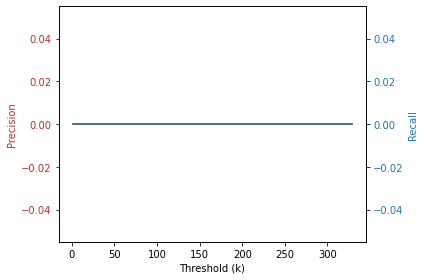

Graph for document 1


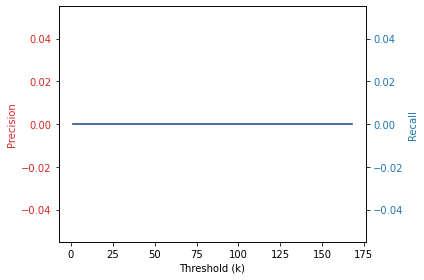

Graph for document 2


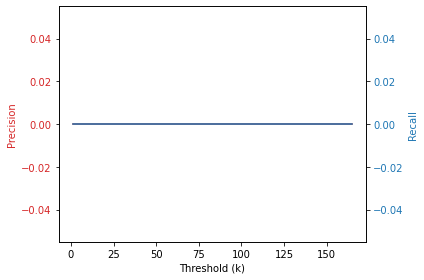

Graph for document 3


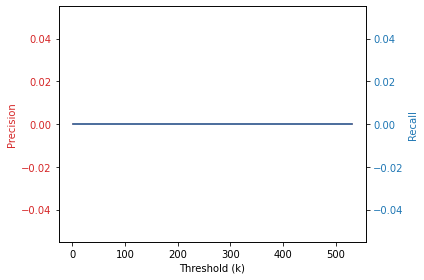

Graph for document 4


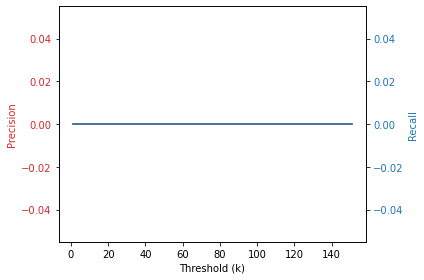

Graph for document 5


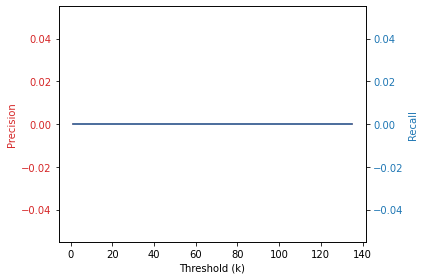

Graph for document 6


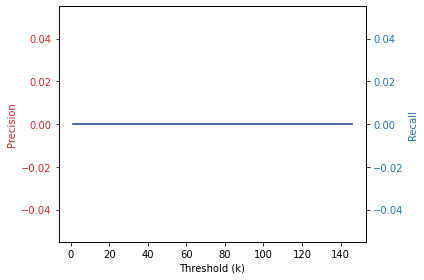

Graph for document 7


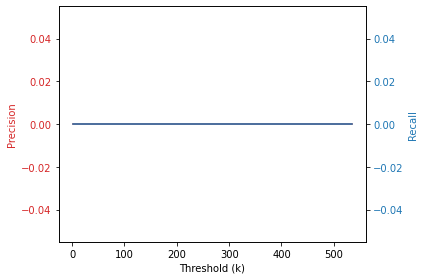

Graph for document 8


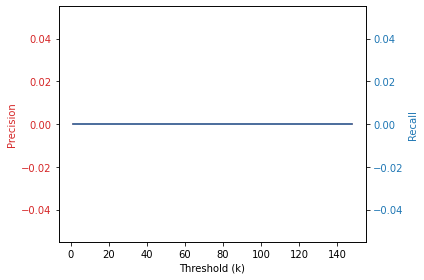

Graph for document 9


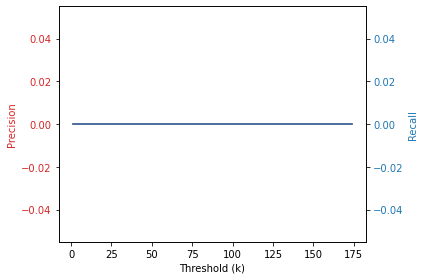

Graph for document 10


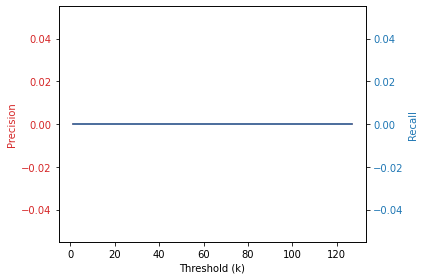

Graph for document 11


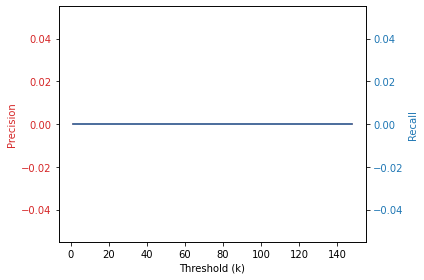

Graph for document 12


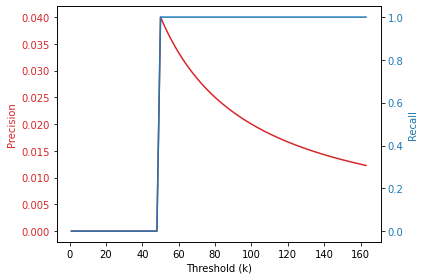

Graph for document 13


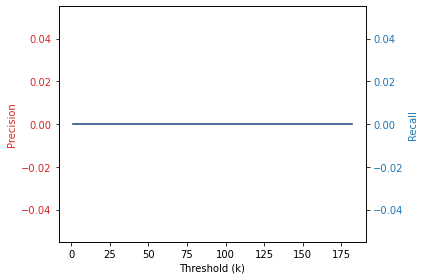

Graph for document 14


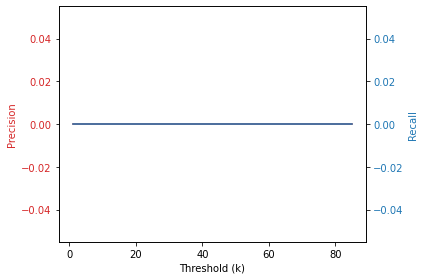

Graph for document 15


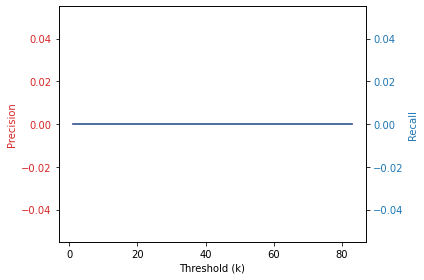

Graph for document 16


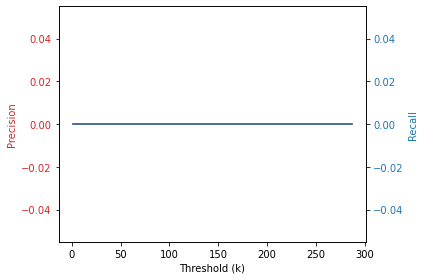

Graph for document 17


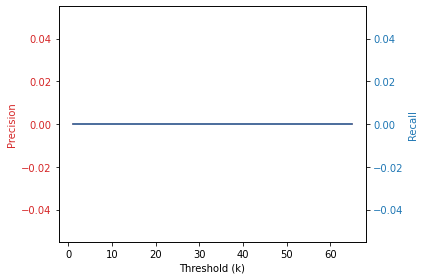

Graph for document 18


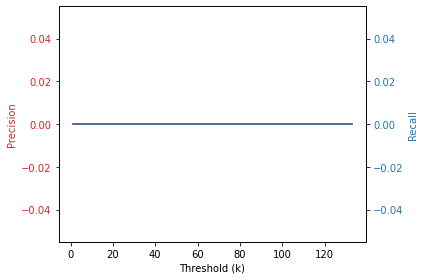

In [81]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [82]:
new_filtered_keyphrases[0]

[('gute aufstiegsmöglichkeiten', 0.9561),
 ('gesundheitliche probleme', 0.9561),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('ein arbeitstitel', 0.9235),
 ('teaching professionals', 0.9181),
 ('hohe arbeitsbelastung', 0.91),
 ('kulturelle schwierigkeiten', 0.9076),
 ('künstlerische ästhetische erfahrungen', 0.8995),
 ('mangelnde motivation', 0.8761),
 ('basic module', 0.8632),
 ('forschungsdaten experimentieren messen', 0.8491),
 ('skills workshops', 0.8465),
 ('einem etablierten betrieb unternehmen', 0.844),
 ('intellektuelle herausforderung', 0.8383),
 ('gesellschaftspolitischen themen', 0.8354),
 ('publikationen verschriftlichen', 0.8346),
 ('eines eigenen unternehmens', 0.8298),
 ('finanzielle förderung', 0.8247),
 ('anderer forscherinnen', 0.8166),
 ('eingereichten manuskripten reviewertätigkeit', 0.8008),
 ('einem startup unternehmen', 0.8003),
 ('neuer analysetools', 0.7674),
 ('neue ideen', 0.765),
 ('eines anderen beschäftigungsverhältnisses', 0.738),
 ('sonstiger fachte

In [83]:
check_new = [elem[0] for elem in new_filtered_keyphrases[12]]
len(check_new)

163

In [84]:
keyphrases_within_text[0]

['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf']

In [85]:
list(set(check_new).intersection(keyphrases_within_text[12]))

['finanzielle situation', 'digitale lehre']

In [86]:
check_new.index('digitale lehre') 

49

In [93]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [94]:
best_recall_indices

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 0, 0, 0, 0, 0, 0]

In [89]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [90]:
best_recall_indices_element

[0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0]

In [95]:
best_precision_indices = []
for i in range(len(precison_values)):
    best_precision_indices.append(precison_values[i].index(max(precison_values[i])))

In [96]:
best_precision_indices

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 0, 0, 0, 0, 0, 0]

In [97]:
best_precision_indices_element = []

for i in range(len(best_precision_indices)):
    Precision_values = precison_values[i]
    best_precision_indices_element.append(Precision_values[best_precision_indices[i]])

In [98]:
best_precision_indices_element

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [91]:
ground_truth_not_in_text = [['promotionsformen', 'promotionsmotive',  'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs','promotionsabbruch', 'strukturierte promotion', 'persönlichkeit', 'erwerbsverläufe', 'promovierte'],
                            ['integration', 'migration'], 
                            ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'abbruchursachen'],
                            ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['studienberechtigte', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['hochschulforschung'],
                            ['integration', 'migration'], 
                            ['hochschulforschung'], 
                            ['internationale studierende', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'persönlichkeit', 'beeinträchtigt studierende', 'studierende', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
                            ['hochschulforschung'],
                            ['absolventen', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung']]

In [92]:
ground_truth_not_in_text

[['promotionsformen',
  'promotionsmotive',
  'monetäre erträge',
  'nicht-monetäre erträge',
  'wissenschaftlicher nachwuchs',
  'promotionsabbruch',
  'strukturierte promotion',
  'persönlichkeit',
  'erwerbsverläufe',
  'promovierte'],
 ['integration', 'migration'],
 ['beruflicher verbleib von exmatrikulierten',
  'studiensituation',
  'studienabbruch',
  'abbruchursachen'],
 ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['studienberechtigte', 'hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['integration', 'migration'],
 ['hochschulforschung'],
 ['internationale studierende',
  'finanzielle situation',
  'studienerfolg',
  'erwerbstätige studierende',
  'persönlichkeit',
  'beeinträchtigt studierende',
  'studierende',
  'gesundheit',
  'studierendenforschung',
  'hochschulforschung'],
 ['hochschulforschung'],
 ['absolventen', 'hochschulforschung'],
 ['ho